# London Bike sharing demand predicton
## Machine learning algorithms for prediction of bike sharing demand in London.

# Loading Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict

# Loading Data

In [2]:
bike_df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv')

bike_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


# Exploring data

In [3]:
# no of rows and columns

bike_df.shape

(17414, 10)

In [4]:
# information about database

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [5]:
# print some statistical data

bike_df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [6]:
# changning time to datatime object

bike_df['timestamp'] = pd.to_datetime(bike_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

type(bike_df['timestamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
# Checking for missing values

bike_df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [8]:
# getting hour, month, year and days of week from timestamp column

bike_df['hour'] = bike_df['timestamp'].apply(lambda time : time.hour)

bike_df['month'] = bike_df['timestamp'].apply(lambda time : time.month)

bike_df['year'] = bike_df['timestamp'].apply(lambda time : time.year)

bike_df['day_of_week'] = bike_df['timestamp'].apply(lambda time : time.dayofweek)

In [9]:
# checking the dataframe

bike_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,2015,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,2015,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,2015,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,2015,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,2015,6


In [10]:
bike_df['day_of_week'].value_counts()

0    2508
6    2505
1    2505
3    2492
2    2489
5    2465
4    2450
Name: day_of_week, dtype: int64

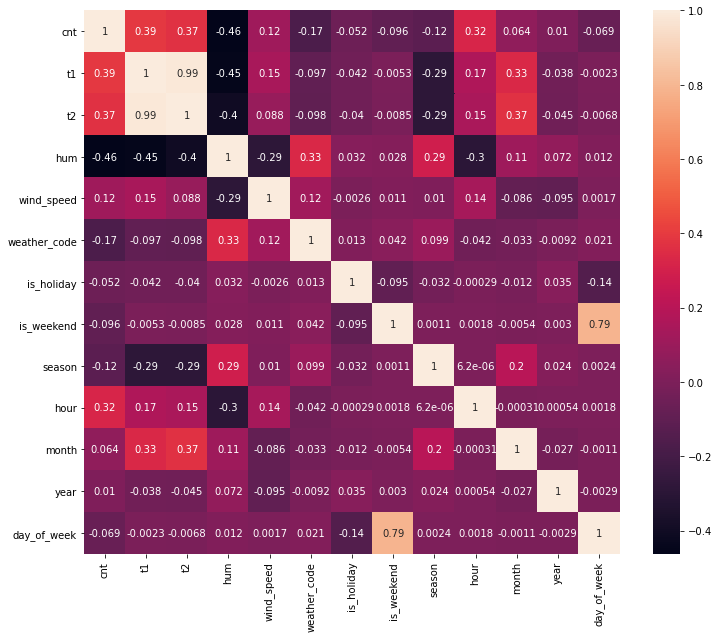

In [11]:
# plotting corelation metrix

fig, ax = plt.subplots(figsize= (12, 10))
sns.heatmap(bike_df.corr(), annot=True, ax=ax)

In [12]:
# renaming columns

bike_df.rename(columns={'cnt': 'bikes_count'}, inplace=True)
bike_df

,timestamp,bikes_count,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,month,year,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,1,2015,6
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,1,2015,6
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,1,2015,6
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,1,2015,6
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,1,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,1,2017,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,1,2017,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,1,2017,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,1,2017,1


In [13]:
# selecting row with max humidity

bike_df.iloc[bike_df['hum'].idxmax()]

# we can see that if the humidity is high bike count is low

timestamp       2015-01-04 03:00:00
bikes_count                      72
t1                                2
t2                                2
hum                             100
wind_speed                        0
weather_code                      1
is_holiday                        0
is_weekend                        1
season                            3
hour                              3
month                             1
year                           2015
day_of_week                       6
Name: 3, dtype: object

In [14]:
# selecting the row with min humidity

bike_df.iloc[bike_df['hum'].idxmin()]

timestamp       2015-06-30 13:00:00
bikes_count                    1845
t1                             28.5
t2                               27
hum                            20.5
wind_speed                       13
weather_code                      1
is_holiday                        0
is_weekend                        0
season                            1
hour                             13
month                             6
year                           2015
day_of_week                       1
Name: 4250, dtype: object

In [15]:
# dropping timestamp columns

bike_df.drop('timestamp', axis=1, inplace=True)

# spliting train and test data

In [16]:
# seperate dependent and independent varaible 

x = bike_df.drop('bikes_count', axis=1)
y = bike_df['bikes_count']

In [17]:
# seperate train and test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [18]:
# create an instance of decision tree regressor

tree_regressor = DecisionTreeRegressor()

# fit the model

tree_regressor.fit(x_train, y_train)

# predict with 

y_predict_test = tree_regressor.predict(x_test)
y_predict_train = tree_regressor.predict(x_train)

# Model evaluation

In [19]:
# Evaluation of train set
print('Evaluation of train set')
print('R-square coefficient of determintion: ', r2_score(y_train, y_predict_train))
print('Mean squared error: ', mean_squared_error(y_train, y_predict_train))
print('Root Mean squared error: ', np.sqrt(mean_squared_error(y_train, y_predict_train)))

# Evaluation of test set
print('\n \nEvaluation of test set')
print('R-square coefficient of determintion: ', r2_score(y_test, y_predict_test))
print('Mean squared error: ', mean_squared_error(y_test, y_predict_test))
print('Root Mean squared error: ', np.sqrt(mean_squared_error(y_test, y_predict_test)))


Evaluation of train set
R-square coefficient of determintion:  0.9999951593998521
Mean squared error:  5.674036321872084
Root Mean squared error:  2.3820235771024776

 
Evaluation of test set
R-square coefficient of determintion:  0.9274172949204526
Mean squared error:  86971.71633649153
Root Mean squared error:  294.9096748777353


# Plotting actual vs predicted data

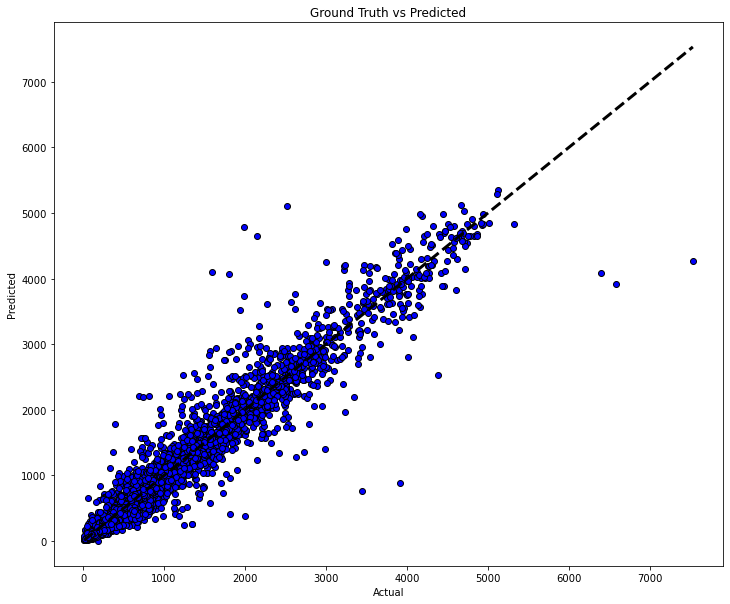

In [20]:
fig, ax = plt.subplots(figsize = (12, 10))
ax.scatter(y_test, y_predict_test, color = 'blue', edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [21]:
# actual vs predicted value

actual_predict = pd.DataFrame(data = {'actual': y_test, 'predicted': y_predict_test})

actual_predict.head()

,actual,predicted
14097,66,67.0
10978,1749,1630.0
7408,172,200.0
6375,2866,2820.0
6874,1550,1371.0


# Hyper paramater tunning

In [22]:
# parameters of decision tree 

param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 15, 20, 30, 40],
              "max_depth": [2, 4, 6, 8, 10, 11],
              "min_samples_leaf": [10, 20,30, 40, 60, 100],
              "max_leaf_nodes": [5, 20, 30, 100],
              }

In [23]:
# Randome search

random_search = RandomizedSearchCV(tree_regressor, param_grid, cv=5)

random_search.fit(x_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [24]:
# print the r square and best paramater

print('R-square:', random_search.best_score_)
print('Best parameter values {}'.format(random_search.best_params_))

R-square: 0.8622696591404357
Best parameter values {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_leaf_nodes': 100, 'max_depth': 11, 'criterion': 'mse'}


### Since the Randome searchCV is not helping us in imporving the model  we wont be using these parameter